In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = 0.666;



In [3]:
global temp_list
temp_list = []
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(100000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(100000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.30058733 0.25668359 0.14118245]
  [0.80815806 0.25668359 0.14118245]
  [0.80815806 0.30058733 0.14118245]
  [0.80815806 0.30058733 0.25668359]]

 [[0.52952475 0.27712627 0.15863142]
  [0.80282184 0.27712627 0.15863142]
  [0.80282184 0.52952475 0.15863142]
  [0.80282184 0.52952475 0.27712627]]

 [[0.95463707 0.6692132  0.50587047]
  [0.96441024 0.6692132  0.50587047]
  [0.96441024 0.95463707 0.50587047]
  [0.96441024 0.95463707 0.6692132 ]]

 ...

 [[0.56668418 0.40561252 0.13651163]
  [0.66147291 0.40561252 0.13651163]
  [0.66147291 0.56668418 0.13651163]
  [0.66147291 0.56668418 0.40561252]]

 [[0.94209791 0.53532865 0.28803924]
  [0.97756883 0.53532865 0.28803924]
  [0.97756883 0.94209791 0.28803924]
  [0.97756883 0.94209791 0.53532865]]

 [[0.86385886 0.46386691 0.31376873]
  [0.94226298 0.46386691 0.31376873]
  [0.94226298 0.86385886 0.31376873]
  [0.94226298 0.86385886 0.46386691]]]
[[[0.53447286 0.42765274 0.03745691]
  [0.77243222 0.42765274 0.03745691]
  [0.77243222 0.5344

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.374372739450135 2.999999999999999 0.37437273945013594


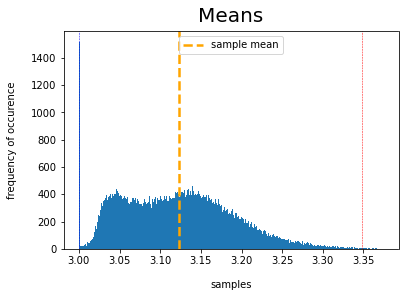

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
training_supervised_label=np.array(training_supervised_label)
print(training_supervised_label)

[[0.75       1.19497221 1.24985188 1.40372696]
 [0.95635576 1.23993871 1.55543681 1.71078288]
 [2.23850565 2.24705718 2.49680306 2.63972795]
 ...
 [1.11617029 1.21856608 1.41990566 1.79415967]
 [1.85354554 1.88458259 2.30674273 2.52312096]
 [1.72792105 1.79652465 2.22990425 2.36124016]]


In [7]:
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


cuda:0


In [8]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0,std =0.2)
        torch.nn.init.normal_(m.bias, mean=0.0,std =0.01)
    elif isinstance(m, torch.nn.Parameter):
         torch.nn.init.normal_(m, mean=0.0,std =0.2)

        

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        
        self.input_dim = Agent_number_n-1
        self.hidden_dim = 20
        self.output_dim = 1
        self.hidden_layer_count = 3
        
        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
        
        self.layer1 = torch.nn.Parameter(torch.Tensor(self.hidden_dim, self.hidden_dim))
        self.bias1 = torch.nn.Parameter(torch.Tensor(self.hidden_dim))
        self.layer2 = torch.nn.Parameter(torch.Tensor(self.hidden_dim, self.output_dim))
        self.bias2 = torch.nn.Parameter(torch.Tensor(self.output_dim))

    def calculate(self, value_list):
        #h0 = torch.cat([torch.tensor([torch.sum(value_list)]).cuda(),value_list])
        h0 = value_list
        for layer in self.layers:
            h0 = torch.relu(layer(h0))
        h1 = h0
        h2 = torch.relu(torch.matmul(h1,self.layer1)-self.bias1) + self.bias1
        h = torch.matmul(h2,self.layer2) + self.bias2
        
        return h

    def forward(self, input_list,input_label,label):
        global iteration,echo,target_order
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).cuda().type(torch.float32)
        h_list = []

        if (target_order == "supervised"):
            loss = 0 
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                loss += torch.square(h - label[i])
                h_list.append(h)
            return loss
        else:
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                h_list.append(h)
            input_label = torch.from_numpy(
                np.array(input_label)).cuda().type(torch.float32)
            sum_h = torch.sum(torch.cat(h_list)).cuda()


            loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                            torch.square(((Agent_number_n-1)*input_label-sum_h)),
                            torch.zeros(1).cuda()
                          )

            loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                            torch.square((sum_h-(Agent_number_n-Alpha)*input_label)),
                            torch.zeros(1).cuda()
                          )

            return loss1,loss2,h_list

In [9]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

net = torch.load("save/Deep_learning_small_4_4")
net.to(dev)

Net(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
  )
)

In [10]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00001)
optimizer = opt.Adam(net.parameters(), lr=0.001)

batch_size = 64
echo = 1

In [11]:
target_order = "supervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        loss_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss = net(training_data[index],training_label[index],training_supervised_label[index])
            denominator += 1
            loss_sum += h_loss
        
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

3024 tensor([1.5463], device='cuda:0', grad_fn=<DivBackward0>) 98.96377563476562
4347 tensor([1.0846], device='cuda:0', grad_fn=<DivBackward0>) 69.41510772705078
8883 tensor([1.1179], device='cuda:0', grad_fn=<DivBackward0>) 71.54582977294922
13104 tensor([1.0363], device='cuda:0', grad_fn=<DivBackward0>) 66.3211441040039
16128 tensor([1.2305], device='cuda:0', grad_fn=<DivBackward0>) 78.74993133544922
25011 tensor([1.0512], device='cuda:0', grad_fn=<DivBackward0>) 67.2762680053711
35091 tensor([1.0701], device='cuda:0', grad_fn=<DivBackward0>) 68.48560333251953
36351 tensor([0.9802], device='cuda:0', grad_fn=<DivBackward0>) 62.73587417602539
36666 tensor([1.1363], device='cuda:0', grad_fn=<DivBackward0>) 72.7215347290039
56007 tensor([0.9611], device='cuda:0', grad_fn=<DivBackward0>) 61.5120735168457
68103 tensor([0.9663], device='cuda:0', grad_fn=<DivBackward0>) 61.840965270996094
68166 tensor([1.0217], device='cuda:0', grad_fn=<DivBackward0>) 65.39013671875
80010 tensor([1.0652], de

In [12]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

6.3262176513671875 1.6506534603942606 4.675564190972927


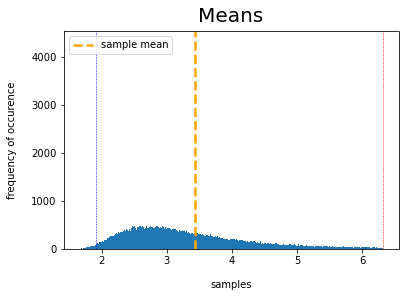

In [13]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [14]:
torch.save(net, "save/Deep_learning_small_4_4")

In [15]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=0.0001)

batch_size = 64
echo = 1

In [16]:
target_order = "unsupervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        
        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss1,h_loss2,h_list = net(training_data[index],training_label[index],0)
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2
            
        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss1_sum),float(loss2_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

4032 tensor([2.7994], device='cuda:0', grad_fn=<DivBackward0>) 75.77011108398438 103.3885498046875
7371 tensor([2.7487], device='cuda:0', grad_fn=<DivBackward0>) 84.36343383789062 91.55155944824219
9450 tensor([2.1569], device='cuda:0', grad_fn=<DivBackward0>) 84.97930908203125 53.061161041259766
15687 tensor([2.5315], device='cuda:0', grad_fn=<DivBackward0>) 84.47767639160156 77.53555297851562
17451 tensor([2.4148], device='cuda:0', grad_fn=<DivBackward0>) 91.59837341308594 62.948448181152344
23247 tensor([1.7620], device='cuda:0', grad_fn=<DivBackward0>) 53.59608840942383 59.17428970336914
28287 tensor([2.3087], device='cuda:0', grad_fn=<DivBackward0>) 49.40036392211914 98.35724639892578
37926 tensor([2.6984], device='cuda:0', grad_fn=<DivBackward0>) 65.12055206298828 107.57579040527344
45045 tensor([2.4295], device='cuda:0', grad_fn=<DivBackward0>) 83.24751281738281 72.241455078125
50715 tensor([2.7653], device='cuda:0', grad_fn=<DivBackward0>) 76.72699737548828 100.25375366210938
6

In [17]:
torch.save(net, "save/Deep_learning_small_4_4")

In [18]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

6.285819053649902 1.640112551308924 4.645706502340978


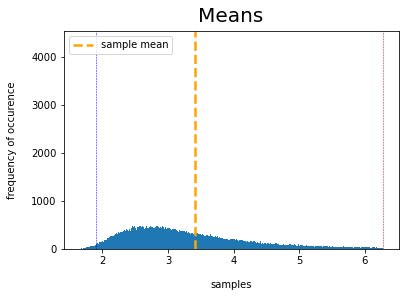

In [19]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [20]:
for param in net.parameters():
    print(param )

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

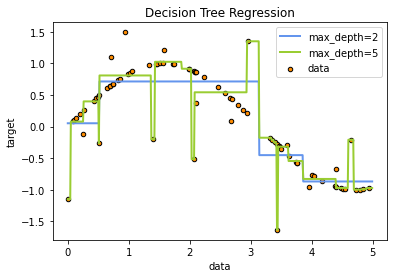

In [21]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [22]:
x_list_3 = []
z_list_3 = []
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list_3.append(training_data[index][i])
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
        z_list_3.append(float(h))
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

regr_3 = DecisionTreeRegressor(max_depth=12)
regr_3.fit(x_list_3, z_list_3)



6.285819053649902 1.640112551308924 4.645706502340978


DecisionTreeRegressor(max_depth=12)

In [23]:
from xgboost import XGBRegressor
from xgboost import plot_tree
regr_4 =XGBRegressor(max_depth=20)
regr_4.fit(np.array(x_list_3), np.array(z_list_3))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
result_list = []
for index in range(len(training_data[:1000])):
    h_list = []
    for i in range(Agent_number_n):
        h = regr_4.predict(np.array([training_data[index][i]]))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/training_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

6.285818576812744 1.7138160592214164 4.5720025175913275


In [25]:
result_list = []
for index in range(len(testing_data[:1000])):
    h_list = []
    for i in range(Agent_number_n):
        h = regr_4.predict(np.array([testing_data[index][i]]))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

6.285818576812744 1.801167423760899 4.484651153051845


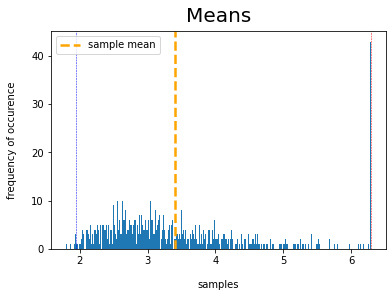

In [26]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()